##Pima Indians Diabetes Database

`Dataset:`https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [2]:
df = pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
X = df.drop("Outcome", axis="columns")
x = X.values

In [15]:
print(X.shape)

(768, 8)


In [25]:
Y = df['Outcome']
y = Y.values

In [17]:
Y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [19]:
print(Y.shape)

(768,)


Text(0.5, 1.0, 'Problem Visualization')

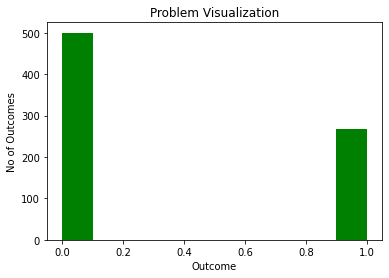

In [22]:
plt.hist(df['Outcome'], color='green')
plt.xlabel("Outcome")
plt.ylabel("No of Outcomes")
plt.title("Problem Visualization")

`Spliting Data`

In [23]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.12, random_state=5)

In [33]:
model = keras.models.Sequential([
  keras.layers.Dense(units=30, input_shape=(8,), activation="relu"),
  keras.layers.Dense(units=24, activation="relu"),
  keras.layers.Dense(units=12, activation="relu"),
  keras.layers.Dense(units=1, activation="sigmoid")
])

In [34]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_9 (Dense)              (None, 24)                744       
_________________________________________________________________
dense_10 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 13        
Total params: 1,327
Trainable params: 1,327
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
22/22 [==============================] - 1s 1ms/step - loss: 2.2979 - accuracy: 0.6021
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8540 - accuracy: 0.6066
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7697 - accuracy: 0.5932
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7285 - accuracy: 0.6353
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.6471
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6591 - accuracy: 0.6406
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6000 - accuracy: 0.6834
Epoch 8/100
22/22 [==============================] - 0s 1ms/step - loss: 0.5941 - accuracy: 0.6818
Epoch 9/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6528 - accuracy: 0.6421
Epoch 10/100
22/22 [==============================] - 0s 1ms/step - loss: 0.5695 - accuracy: 0.6920
Epoch 11/

In [37]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.5584 - accuracy: 0.7312


[0.5584361553192139, 0.7311828136444092]

In [38]:
yp = model.predict(X_test)

y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

Text(69.0, 0.5, 'Truth')

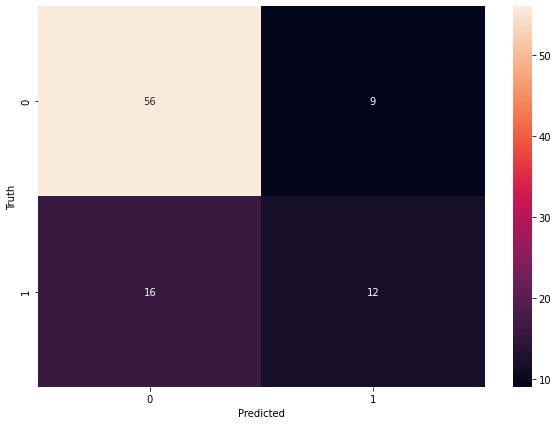

In [39]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using **SMOTE** to handle Imbalance Data

In [40]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [48]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [49]:
print(X_sm.shape, y_sm.shape)

(1000, 8) (1000,)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [51]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4571 - accuracy: 0.7800
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4469 - accuracy: 0.7887
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4467 - accuracy: 0.7812
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4355 - accuracy: 0.8012
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4258 - accuracy: 0.8062
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4218 - accuracy: 0.8075
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.8012
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4304 - accuracy: 0.7912
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4353 - accuracy: 0.7912
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4426 - accuracy: 0.7950
Epoch 11/

In [52]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.5123 - accuracy: 0.7550


[0.5122868418693542, 0.7549999952316284]

In [53]:
yp = model.predict(X_test)

y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

Text(69.0, 0.5, 'Truth')

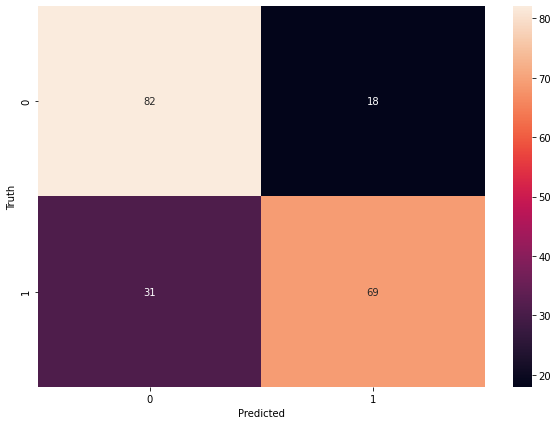

In [54]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [55]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77       100
           1       0.79      0.69      0.74       100

    accuracy                           0.76       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.76      0.76      0.75       200

